In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  
NavigationToolbar2Tk) 

In [2]:
def julia_quadratic(z, threshold):
    """Calculates whether the number z[0] = zx + i*zy with a constant c = x + i*y
    belongs to the Julia set. In order to belong, the sequence 
    z[i + 1] = z[i]**2 + c, must not diverge after 'threshold' number of steps.
    The sequence diverges if the absolute value of z[i+1] is greater than 4.
    
    :param float zx: the x component of z[0]
    :param float zy: the y component of z[0]
    :param float cx: the x component of the constant c
    :param float cy: the y component of the constant c
    :param int threshold: the number of iterations to considered it converged
    """
    # initial conditions
    c = -0.4+0.6j
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return threshold - 1  # it didn't diverge

In [3]:
# counts the number of iterations until the function diverges or
# returns the iteration threshold that we check until
def countIterationsUntilDivergent(c, threshold):
    z = complex(0, 0)
    for iteration in range(threshold):
        z = (z*z) + c
        if abs(z) > 4:
            break
            pass
        pass
    return iteration
# takes the iteration limit before declaring function as convergent and
# takes the density of the atlas

# create atlas, plot mandelbrot set, display set
def mandelbrot(threshold, density, zoomLevel=0, zoomFocus=(121.38500005/300,121.3805/300), realBounds=(-2.25, 0.75), imagBounds=(-1.5,1.5)):
    # location and size of the atlas rectangle
    # realAxis = np.linspace(-2.25, 0.75, density)
    # imaginaryAxis = np.linspace(-1.5, 1.5, density)
    
    zoomFac = 2 #speed of the zoom
    
    # Get the zoom box
    if zoomLevel==0:
        realZoomBounds = realBounds
        imagZoomBounds = imagBounds
    else:
        realWidth = (realBounds[1] - realBounds[0])
        realCenter = realWidth * zoomFocus[0] + realBounds[0]
        realZoomWidth = realWidth / (zoomFac**(zoomLevel - 1))
        realZoomBounds = (realCenter-realZoomWidth/2, realCenter+realZoomWidth/2)

        imagWidth = (imagBounds[1] - imagBounds[0])
        imagCenter = imagWidth * zoomFocus[1] + imagBounds[0]
        imagZoomWidth = imagWidth / (zoomFac**(zoomLevel - 1))
        imagZoomBounds = (imagCenter-imagZoomWidth/2, imagCenter+imagZoomWidth/2)
        
    
    realAxis = np.linspace(realZoomBounds[0], realZoomBounds[1], density)
    imaginaryAxis = np.linspace(imagZoomBounds[0], imagZoomBounds[1], density)
    realAxisLen = len(realAxis)
    imaginaryAxisLen = len(imaginaryAxis)
    # 2-D array to represent mandelbrot atlas
    atlas = np.empty((realAxisLen, imaginaryAxisLen))
    # color each point in the atlas depending on the iteration count
    for ix in range(realAxisLen):
        for iy in range(imaginaryAxisLen):
            cx = realAxis[ix]
            cy = imaginaryAxis[iy]
            c = complex(cx, cy)
            atlas[ix, iy] = countIterationsUntilDivergent(c, threshold)
            pass
        pass
    f = plt.Figure()
    a = f.add_subplot(111)

    # plot and display mandelbrot set
    a.imshow(np.log(atlas.T), interpolation="nearest", cmap=plt.get_cmap('plasma'))
    return f

def julia(threshold, density, zoomLevel=0, zoomFocus=(121.38500005/300,121.3805/300), realBounds=(-2.25, 0.75), imagBounds=(-1.5,1.5)):
    # location and size of the atlas rectangle
    # realAxis = np.linspace(-2.25, 0.75, density)
    # imaginaryAxis = np.linspace(-1.5, 1.5, density)
    
    zoomFac = 2 #speed of the zoom
    
    # Get the zoom box
    if zoomLevel==0:
        realZoomBounds = realBounds
        imagZoomBounds = imagBounds
    else:
        realWidth = (realBounds[1] - realBounds[0])
        realCenter = realWidth * zoomFocus[0] + realBounds[0]
        realZoomWidth = realWidth / (zoomFac**(zoomLevel - 1))
        realZoomBounds = (realCenter-realZoomWidth/2, realCenter+realZoomWidth/2)

        imagWidth = (imagBounds[1] - imagBounds[0])
        imagCenter = imagWidth * zoomFocus[1] + imagBounds[0]
        imagZoomWidth = imagWidth / (zoomFac**(zoomLevel - 1))
        imagZoomBounds = (imagCenter-imagZoomWidth/2, imagCenter+imagZoomWidth/2)
        
    
    realAxis = np.linspace(realZoomBounds[0], realZoomBounds[1], density)
    imaginaryAxis = np.linspace(imagZoomBounds[0], imagZoomBounds[1], density)
    realAxisLen = len(realAxis)
    imaginaryAxisLen = len(imaginaryAxis)
    # 2-D array to represent mandelbrot atlas
    atlas = np.empty((realAxisLen, imaginaryAxisLen))
    # color each point in the atlas depending on the iteration count
    for ix in range(realAxisLen):
        for iy in range(imaginaryAxisLen):
            zx = realAxis[ix]
            zy = imaginaryAxis[iy]
            z = complex(zx, zy)
            atlas[ix, iy] = julia_quadratic(z, threshold)
            pass
        pass
    f = plt.Figure()
    a = f.add_subplot(111)

    # plot and display mandelbrot set
    a.imshow(np.log(atlas.T), interpolation="nearest", cmap=plt.get_cmap('plasma'))
    return f

<ipython-input-3-74319f1b0f9e>:103: RuntimeWarning: divide by zero encountered in log
  a.imshow(np.log(atlas.T), interpolation="nearest", cmap=plt.get_cmap('plasma'))


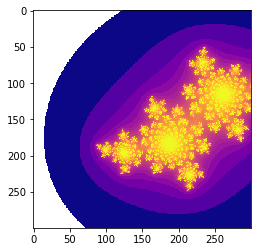

In [4]:
julia(120,300,zoomFocus=(121.38500005/300,121.3805/300),zoomLevel=0)

In [10]:
#### time to party!!
mandelbrot(120,300,zoomFocus=(zoomx/300, zoomy/300),zoomLevel=0)

NameError: name 'zoomx' is not defined

In [6]:
plotting_function = mandelbrot
zoomCounter = 0 
def zoom_plus(ix,iy): # without event because I use `command=` instead of `bind`
    global zoomCounter, plotting_function
    zoomCounter = zoomCounter + 1
    
    plot_plotting_function()
    

def zoom_minus(event): # without event because I use `command=` instead of `bind`
    global zoomCounter, plotting_function
    zoomCounter = zoomCounter - 1
    if zoomCounter < 0:
        zoomCounter = 0

    plot_plotting_function()
    
    
def close_window():
    window.destroy()
    
def plot_mandelbrot():
    global zoomCounter, plotting_function
    plotting_function = mandelbrot
    plot_plotting_function()
    
def plot_julia():
    global zoomCounter, plotting_function
    plotting_function = julia
    plot_plotting_function()

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print(ix, iy)
    zoom_plus(ix,iy)
def plot_plotting_function():
    global zoomCounter, plotting_function
    
    
    f = plotting_function(150,300,zoomLevel=zoomCounter)
    
    # creating the Tkinter canvas 
    # containing the Matplotlib figure 
    canvas = FigureCanvasTkAgg(f,master = window)   
    cid = canvas.mpl_connect('button_press_event', onclick)
    canvas.draw() 
  
    # placing the canvas on the Tkinter window 
    canvas.get_tk_widget().grid(row=4,columnspan=2) 
  
    ## creating the Matplotlib toolbar 
    #toolbar = NavigationToolbar2Tk(canvas, 
    #                               window) 
    #toolbar.update() 
  
    # placing the toolbar on the Tkinter window 
    #canvas.get_tk_widget().grid(row=3,columnspan=2) 
    



        

In [14]:
global zoomCounter
zoomCounter = 0

window = Tk()
window.title("Fractals")
window.configure(background="black")

window.bind('<Button-2>',zoom_minus)
label1 = Label (window, text= "Choose Fractal Type:", \
                bg="black", fg="white", font="none 20 bold").grid(row=0, column=0, columnspan=2, sticky=E)

buttonJ = Button(window,text = 'Julia', command=plot_julia).grid(row=1, column=0)
buttonM = Button(window,text = 'mandlebrot', command=plot_mandelbrot).grid(row=1, column=1)

buttonplus = Button(window, text = '+', command=zoom_plus).grid(row=1, column=2)
buttonminus = Button(window, text = '-', command=zoom_minus).grid(row=2, column=2)

#canvas = FigureCanvasTkAgg(f, master=window)
#canvas.draw()
#canvas.get_tk_widget().pack(side="top", fill="both", expand=1)
#canvas._tkcanvas.pack(side="top", fill="both", expand=1)

window.mainloop()

None None
96.51986754966885 121.5198675496689
179.30132450331124 122.89955849889625
179.30132450331124 122.89955849889625
215.17328918322292 154.63245033112585
241.387417218543 116.0011037527594
208.27483443708607 129.79801324503313
230.34988962472406 109.10264900662253
208.27483443708607 136.69646799117
